This notebook examines the effect of a random trigger on the attack.

# Imports

In [ ]:
%pylab inline
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
import os
import torch
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

# Preproccessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# GPWRData = pd.read_csv("/content/drive/MyDrive/GPWRCompleteDatasetwithTransient - GPWRCompleteDatasetwithTransient.csv")

In [ ]:
GPWRData = pd.read_csv("/content/drive/MyDrive/GPWRCompleteDatasetwithTransient - GPWRCompleteDataset - GPWRCompleteDatasetwithTransient2.csv", header=None)

In [ ]:
GPWRData.head()

0        1    2    3        4        5        6        7        8   \
0  20  25.0013  2.4  4.5  578.103  562.396  562.396  578.187  562.404   
1  21  24.9863  2.4  4.5  578.096  562.398  562.398  578.187  562.405   
2  22  24.9727  2.4  4.5  578.094  562.399  562.399  578.189  562.406   
3  23  24.9644  2.4  4.5  578.096  562.400  562.400  578.191  562.407   
4  24  24.9562  2.4  4.5  578.095  562.401  562.401  578.190  562.407   

        9   ...       26       27       28       29       30       31  \
0  562.404  ...  1097.22  1097.23  570.272  2242.58  34.5050  653.191   
1  562.405  ...  1097.25  1097.25  570.272  2242.12  34.4791  653.162   
2  562.406  ...  1097.27  1097.27  570.272  2241.15  34.4571  653.100   
3  562.407  ...  1097.29  1097.29  570.273  2239.57  34.4317  653.000   
4  562.407  ...  1097.31  1097.31  570.273  2237.37  34.4016  652.859   

        32       33   34                           35  
0  653.191  272.320  BOL  Transient- Depressurization  
1  653.162  272.317  BOL  Transient- Depressurization  
2  653.100  272.314  BOL  Transient- Depressurization  
3  653.000  272.315  BOL  Transient- Depressurization  
4  652.859  272.318  BOL  Transient- Depressurization  

[5 rows x 36 columns]

In [ ]:
#Checking Contents
print(GPWRData.head())
print(GPWRData.info())
print(GPWRData.describe())

   0        1    2    3        4        5        6        7        8   \
0  20  25.0013  2.4  4.5  578.103  562.396  562.396  578.187  562.404   
1  21  24.9863  2.4  4.5  578.096  562.398  562.398  578.187  562.405   
2  22  24.9727  2.4  4.5  578.094  562.399  562.399  578.189  562.406   
3  23  24.9644  2.4  4.5  578.096  562.400  562.400  578.191  562.407   
4  24  24.9562  2.4  4.5  578.095  562.401  562.401  578.190  562.407   

        9   ...       26       27       28       29       30       31  \
0  562.404  ...  1097.22  1097.23  570.272  2242.58  34.5050  653.191   
1  562.405  ...  1097.25  1097.25  570.272  2242.12  34.4791  653.162   
2  562.406  ...  1097.27  1097.27  570.272  2241.15  34.4571  653.100   
3  562.407  ...  1097.29  1097.29  570.273  2239.57  34.4317  653.000   
4  562.407  ...  1097.31  1097.31  570.273  2237.37  34.4016  652.859   

        32       33   34                           35  
0  653.191  272.320  BOL  Transient- Depressurization  
1  653.162

In [ ]:
#Removing unneeded columns
Analysis_Dataset=GPWRData.drop([1,10,11,12,13,18,20,30], axis=1)

In [ ]:
#Checking contents of new dataframe 
Analysis_Dataset.head()

0    2    3        4        5        6        7        8        9   \
0  20  2.4  4.5  578.103  562.396  562.396  578.187  562.404  562.404   
1  21  2.4  4.5  578.096  562.398  562.398  578.187  562.405  562.405   
2  22  2.4  4.5  578.094  562.399  562.399  578.189  562.406  562.406   
3  23  2.4  4.5  578.096  562.400  562.400  578.191  562.407  562.407   
4  24  2.4  4.5  578.095  562.401  562.401  578.190  562.407  562.407   

        14  ...       25       26       27       28       29       31  \
0  616.982  ...  276.522  1097.22  1097.23  570.272  2242.58  653.191   
1  617.019  ...  276.414  1097.25  1097.25  570.272  2242.12  653.162   
2  617.023  ...  276.346  1097.27  1097.27  570.272  2241.15  653.100   
3  617.010  ...  276.323  1097.29  1097.29  570.273  2239.57  653.000   
4  616.983  ...  276.343  1097.31  1097.31  570.273  2237.37  652.859   

        32       33   34                           35  
0  653.191  272.320  BOL  Transient- Depressurization  
1  653.162  272.317  BOL  Transient- Depressurization  
2  653.100  272.314  BOL  Transient- Depressurization  
3  653.000  272.315  BOL  Transient- Depressurization  
4  652.859  272.318  BOL  Transient- Depressurization  

[5 rows x 28 columns]

In [ ]:
#The Column Reactor Core life if a Qualitative Feature. TPOT requires the use of numerical features in model construction,
#as such the column will be converted using dummy variables
#Converting Catergorical Features to Numerical Features for reactor life
#Converting Catergorical Features to Numerical Features for reactor life
#print(reactordata[[33]])
Analysis_Dataset[34].nunique()



3

In [ ]:
pd.Series(Analysis_Dataset[34]).unique()

array(['BOL', 'MOL', 'EOL'], dtype=object)

In [ ]:
#It look like there was an added space in some of the values for the core life.
#Pandas is treating this as a unique value, so there values must be corrected before dummy variables can be made 

In [ ]:
for index, row in Analysis_Dataset.iterrows():
    if Analysis_Dataset[34][index] == 'BOL ':
        Analysis_Dataset[34][index]= 'BOL'
    elif Analysis_Dataset[34][index] == 'MOL ':
        Analysis_Dataset[34][index] = 'MOL'
    elif Analysis_Dataset[34][index] == 'EOL ':
        Analysis_Dataset[34][index]= 'EOL'

In [ ]:
print(Analysis_Dataset[34].nunique())
pd.Series(Analysis_Dataset[34]).unique()

3


array(['BOL', 'MOL', 'EOL'], dtype=object)

In [ ]:
#Now that the corelife only has the 3 different labels, the dummy variables can be created
dummy = (pd.get_dummies(Analysis_Dataset[34])).iloc[:,1:]
print(dummy)

        EOL  MOL
0         0    0
1         0    0
2         0    0
3         0    0
4         0    0
...     ...  ...
111061    0    1
111062    0    1
111063    0    1
111064    0    1
111065    0    1

[111066 rows x 2 columns]


In [ ]:
#Adding the Dummy Variables to the Analysis_Dataset DataFrame
Analysis_Dataset = pd.concat([Analysis_Dataset, dummy], axis=1)
#Verify that the Columns were correctly added 
#print(Analysis_Dataset.head())
#Dropping the Qualitative Feature from the Analysis_Dataset DataFrame
Analysis_Dataset.drop([34], axis=1, inplace=True)
#print(Analysis_Dataset.head())


In [ ]:
#The dummary variables have been added correctly
#The Target Data must also be but in numerical form
#Confirming that there are 12 different events 
Analysis_Dataset[35].head()
Analysis_Dataset[35].nunique()
pd.Series(Analysis_Dataset[35]).unique()

array(['Transient- Depressurization', 'Transient-Feedwater Pump Trip',
       'Transient-LOCA LOOP', 'Transient- Max Steam Line Rupture',
       'Transient-Manual Trip', 'TRANSIENT-Normal Ops',
       'Transient Rapid Power Change', 'Transient Load Rejection',
       'Transient Single Coolant Pump Trip',
       'Transient Total Coolant Pump Trip',
       'Transient Turbine Trip No SCRAM', 'Transient Valve Closure'],
      dtype=object)

In [ ]:
#Converting Caterorical Feature to Numerical Features for Transient Events
# Change all transients to 1 and leave normal 0 for comparison to asherah
Analysis_Dataset[35] = Analysis_Dataset[35].map({'Transient-Feedwater Pump Trip' : 1,
'Transient-LOCA LOOP' : 2, 'Transient Valve Closure' : 3,
'Transient Rapid Power Change' : 4, 'TRANSIENT-Normal Ops' : 0, 'Transient- Max Steam Line Rupture' : 6,
'Transient-Manual Trip' : 7, 'Transient Load Rejection' : 8, 'Transient Single Coolant Pump Trip': 9, 
'Transient Total Coolant Pump Trip': 10, 'Transient Turbine Trip No SCRAM': 11, 'Transient- Depressurization': 5 })

In [ ]:
#Verify Changes were done correctly 
#print(Analysis_Dataset.head())
print(Analysis_Dataset[35].nunique())
print(pd.Series(Analysis_Dataset[35]).unique())

12
[ 5  1  2  6  7  0  4  8  9 10 11  3]


In [ ]:
Analysis_Dataset.head()

0    2    3        4        5        6        7        8        9  \
0  20  2.4  4.5  578.103  562.396  562.396  578.187  562.404  562.404   
1  21  2.4  4.5  578.096  562.398  562.398  578.187  562.405  562.405   
2  22  2.4  4.5  578.094  562.399  562.399  578.189  562.406  562.406   
3  23  2.4  4.5  578.096  562.400  562.400  578.191  562.407  562.407   
4  24  2.4  4.5  578.095  562.401  562.401  578.190  562.407  562.407   

        14  ...       26       27       28       29       31       32  \
0  616.982  ...  1097.22  1097.23  570.272  2242.58  653.191  653.191   
1  617.019  ...  1097.25  1097.25  570.272  2242.12  653.162  653.162   
2  617.023  ...  1097.27  1097.27  570.272  2241.15  653.100  653.100   
3  617.010  ...  1097.29  1097.29  570.273  2239.57  653.000  653.000   
4  616.983  ...  1097.31  1097.31  570.273  2237.37  652.859  652.859   

        33  35  EOL  MOL  
0  272.320   5    0    0  
1  272.317   5    0    0  
2  272.314   5    0    0  
3  272.315   5    0    0  
4  272.318   5    0    0  

[5 rows x 29 columns]

In [ ]:
Analysis_Dataset = Analysis_Dataset.assign(Pad = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad1 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad2 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad3 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad4 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad5 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad6 = 0)
Analysis_Dataset = Analysis_Dataset.assign(Pad7 = 0)
# good_run = good_run.assign(Pad1 = 0)
# good_run = good_run.assign(Pad2 = 0)
# good_run = good_run.assign(Pad3 = 0)
# good_run = good_run.assign(Pad4 = 0)
# good_run = good_run.assign(Pad5 = 0)
# good_run = good_run.assign(Pad6 = 0)
# good_run = good_run.assign(Steady = 1)

In [ ]:
Analysis_Dataset.head()

0    2    3        4        5        6        7        8        9  \
0  20  2.4  4.5  578.103  562.396  562.396  578.187  562.404  562.404   
1  21  2.4  4.5  578.096  562.398  562.398  578.187  562.405  562.405   
2  22  2.4  4.5  578.094  562.399  562.399  578.189  562.406  562.406   
3  23  2.4  4.5  578.096  562.400  562.400  578.191  562.407  562.407   
4  24  2.4  4.5  578.095  562.401  562.401  578.190  562.407  562.407   

        14  ...  EOL  MOL  Pad  Pad1  Pad2  Pad3  Pad4  Pad5  Pad6  Pad7  
0  616.982  ...    0    0    0     0     0     0     0     0     0     0  
1  617.019  ...    0    0    0     0     0     0     0     0     0     0  
2  617.023  ...    0    0    0     0     0     0     0     0     0     0  
3  617.010  ...    0    0    0     0     0     0     0     0     0     0  
4  616.983  ...    0    0    0     0     0     0     0     0     0     0  

[5 rows x 37 columns]

In [ ]:
#Creating the Training and Testing Datasets 
#Storing Prediction values
#Training Data 
#print(Analysis_Dataset.shape)
nukedata = Analysis_Dataset.drop([35], axis=1)
#Verify Training Dataset
#print(X.head())
#print(X.shape)
# Testing Dataset 
target = Analysis_Dataset[35]
#Verify Testing Dataset
#print(Y.head())
#print(Y.shape)

In [ ]:
nukedata

0    2    3        4        5        6        7        8        9  \
0        20  2.4  4.5  578.103  562.396  562.396  578.187  562.404  562.404   
1        21  2.4  4.5  578.096  562.398  562.398  578.187  562.405  562.405   
2        22  2.4  4.5  578.094  562.399  562.399  578.189  562.406  562.406   
3        23  2.4  4.5  578.096  562.400  562.400  578.191  562.407  562.407   
4        24  2.4  4.5  578.095  562.401  562.401  578.190  562.407  562.407   
...     ...  ...  ...      ...      ...      ...      ...      ...      ...   
111061  615  2.4  4.5  573.678  572.803  572.803  573.654  572.713  572.713   
111062  616  2.4  4.5  573.660  572.782  572.782  573.636  572.694  572.694   
111063  617  2.4  4.5  573.641  572.762  572.762  573.617  572.675  572.675   
111064  618  2.4  4.5  573.622  572.741  572.741  573.599  572.656  572.656   
111065  619  2.4  4.5  573.603  572.720  572.720  573.580  572.637  572.637   

             14  ...  EOL  MOL  Pad  Pad1  Pad2  Pad3  Pad4  Pad5  Pad6  Pad7  
0       616.982  ...    0    0    0     0     0     0     0     0     0     0  
1       617.019  ...    0    0    0     0     0     0     0     0     0     0  
2       617.023  ...    0    0    0     0     0     0     0     0     0     0  
3       617.010  ...    0    0    0     0     0     0     0     0     0     0  
4       616.983  ...    0    0    0     0     0     0     0     0     0     0  
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  
111061  612.014  ...    0    1    0     0     0     0     0     0     0     0  
111062  612.076  ...    0    1    0     0     0     0     0     0     0     0  
111063  612.136  ...    0    1    0     0     0     0     0     0     0     0  
111064  612.197  ...    0    1    0     0     0     0     0     0     0     0  
111065  612.257  ...    0    1    0     0     0     0     0     0     0     0  

[111066 rows x 36 columns]

In [ ]:
target

0         5
1         5
2         5
3         5
4         5
         ..
111061    3
111062    3
111063    3
111064    3
111065    3
Name: 35, Length: 111066, dtype: int64

In [ ]:
type(target)

pandas.core.series.Series

In [ ]:
type(nukedata)

pandas.core.frame.DataFrame

In [ ]:
target = target.to_numpy()
nukedata = nukedata.to_numpy()

In [ ]:
nukedata.shape

(111066, 36)

In [ ]:
# Format data for Pytorch and model requirements
nukedata = nukedata.reshape(111066,1,36)

In [ ]:
# torch.from_numpy(target)

In [ ]:
# Create class for the data
class NukeData(torch.utils.data.Dataset):
  def __init__(self, transform=None): 
      self.x = torch.from_numpy(nukedata)
      self.y = torch.from_numpy(target) #creates tensor from numpy array
      self.n_samples = nukedata.shape[0]
      self.transform = transform


  def __getitem__(self, index):
      return self.x[index], self.y[index]

  def __len__(self):
      return self.n_samples

dataset = NukeData()

In [ ]:
type(target)

numpy.ndarray

In [ ]:
# Create training and testing datasets 80-20 split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [ ]:
print(train_size)
print(test_size)

88852
22214


In [ ]:
# Create Dataloaders --- Pytorch requirement
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10000, shuffle=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10000, shuffle=True, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Model/Training/Testing


In [ ]:
class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 9, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv1d(9, 20, kernel_size=3, stride=2, padding=1)
        
        self.conv2_drop = nn.Dropout1d()

        self.fc1 = nn.Linear(180, 50)
        self.fc2 = nn.Linear(50, 12)

    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        # print('x_shape:',x.shape)
        x = x.view(-1, 180)

        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

    def get_fc1(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        # print('x_shape:',x.shape)
        x = x.view(-1, 180)
        x = torch.sigmoid(self.fc1(x))
        return x
    
    def get_fc2(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        # print('x_shape:',x.shape)
        x = x.view(-1, 180)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = CnnModel().to(device)

In [ ]:
model

CnnModel(
  (conv1): Conv1d(1, 9, kernel_size=(3,), stride=(2,), padding=(1,))
  (conv2): Conv1d(9, 20, kernel_size=(3,), stride=(2,), padding=(1,))
  (conv2_drop): Dropout1d(p=0.5, inplace=False)
  (fc1): Linear(in_features=180, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=12, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(epoch, model, device, train_loader,optimizer, interval):
    losses = []
    correct = 0

    for batch_idx, (data, target) in enumerate(tqdm(train_loader,leave=False)):
        data, target = data.to(device), target
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        if batch_idx % interval == 0:
            print('Train Epoch: {}\tLoss: {:.6f}'.format(
                epoch+1, loss.item()))
    return losses, correct / len(train_loader.dataset)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    losses = []
    with torch.no_grad():
        for data, target in tqdm(test_loader, leave=False):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            test_loss += loss.item() # sum up batch loss
            losses.append(loss.item())
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

            # # Store wrongly predicted images
            wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
            wrong_samples = data[wrong_idx]
            wrong_preds = pred[wrong_idx]
            actual_preds = target.view_as(pred)[wrong_idx]

            for i in range(len(wrong_idx)):
                sample = wrong_samples[i]
                wrong_pred = wrong_preds[i]
                actual_pred = actual_preds[i]


    test_loss /= len(test_loader.dataset)
    
    return losses, correct / len(test_loader.dataset), wrong_preds, actual_preds

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.double()

CnnModel(
  (conv1): Conv1d(1, 9, kernel_size=(3,), stride=(2,), padding=(1,))
  (conv2): Conv1d(9, 20, kernel_size=(3,), stride=(2,), padding=(1,))
  (conv2_drop): Dropout1d(p=0.5, inplace=False)
  (fc1): Linear(in_features=180, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=12, bias=True)
)

In [ ]:
train_loss = []
test_loss = []
accuracy_train = []
accuracy_test = []
for epoch in range(30):
    train_loss_current, accuracy_train_current = train(epoch, model, device, train_loader, optimizer, interval=3099)
    test_loss_current, accuracy_test_current, incorrect_predictions, actual_predictions = test(model, device, test_loader)
    train_loss.append(np.mean(train_loss_current))
    test_loss.append(np.mean(test_loss_current))
    accuracy_train.append(accuracy_train_current)
    accuracy_test.append(accuracy_test_current)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 1	Loss: 2.545029


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 2	Loss: 2.414590


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 3	Loss: 2.237939


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 4	Loss: 1.872602


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 5	Loss: 1.512705


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 6	Loss: 1.217515


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 7	Loss: 1.047171


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 8	Loss: 0.946689


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 9	Loss: 0.888285


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 10	Loss: 0.847198


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 11	Loss: 0.796538


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 12	Loss: 0.749471


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 13	Loss: 0.699756


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 14	Loss: 0.633637


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 15	Loss: 0.572856


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 16	Loss: 0.528631


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 17	Loss: 0.499217


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 18	Loss: 0.491667


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 19	Loss: 0.473163


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 20	Loss: 0.426373


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 21	Loss: 0.416962


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 22	Loss: 0.399574


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 23	Loss: 0.374744


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 24	Loss: 0.370102


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 25	Loss: 0.353637


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 26	Loss: 0.356443


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 27	Loss: 0.357172


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 28	Loss: 0.331806


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 29	Loss: 0.325811


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Train Epoch: 30	Loss: 0.316327


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
accuracy_train

[0.15450411920947194,
 0.1633615450411921,
 0.2910120199882951,
 0.48108089857290776,
 0.5579953180569936,
 0.6075833971098006,
 0.634189438617026,
 0.6665916355287445,
 0.672444064286679,
 0.6839913564129113,
 0.7022351775987035,
 0.7093481294737316,
 0.7525435555755638,
 0.7743213433574934,
 0.7878832215369378,
 0.7982262638995183,
 0.8102687615360374,
 0.8152545806509701,
 0.8176630801782739,
 0.8239769504344303,
 0.8309886102732634,
 0.8356480439382343,
 0.8378427047224598,
 0.8393395759240084,
 0.8395871786791519,
 0.8407239004186737,
 0.8429298158735875,
 0.843244946652861,
 0.8443704137216945,
 0.8460698689956332]

In [ ]:
accuracy_test

[0.1575582965697308,
 0.1575582965697308,
 0.3915548753038624,
 0.5058521653011614,
 0.5757630323219591,
 0.6195192221121815,
 0.6696677770775187,
 0.6957324209957685,
 0.6797965247141442,
 0.6769604753758891,
 0.680876924462051,
 0.7452957594309895,
 0.7680291707931934,
 0.7771675519942378,
 0.7816692176105159,
 0.8075087782479518,
 0.8040424957234177,
 0.8058431619699289,
 0.8228594579994598,
 0.8267308904294589,
 0.8335734221662014,
 0.8305573062032953,
 0.8394706041235257,
 0.8370397046907355,
 0.8367696047537589,
 0.8378049878455028,
 0.8426217700549203,
 0.8416764202755019,
 0.8445574862699199,
 0.8446925362384082]

In [ ]:
torch.topk(torch.abs(model.fc1.weight).sum(dim=1), k=5)[1][0].item()

12

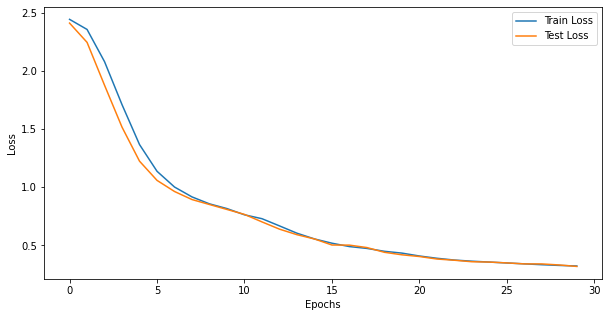

In [ ]:
# Test Loss and Train Loss
plt.figure(figsize=(10,5))
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Text(0, 0.5, 'Accuracy')

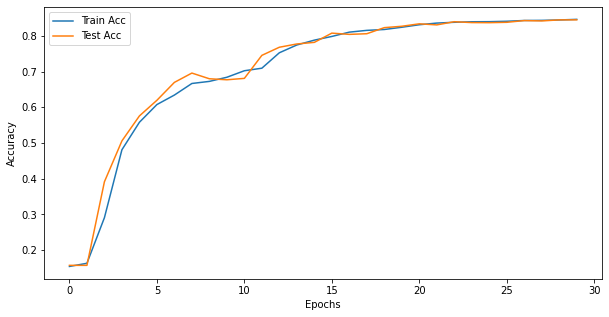

In [ ]:
# Test Acc and Train Acc
plt.figure(figsize=(10,5))
plt.plot(accuracy_train, label="Train Acc")
plt.plot(accuracy_test, label="Test Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Data Visualization


In [ ]:
dataiter = iter(train_loader)
features, labels = dataiter.next()

In [ ]:
# figure(figsize=(20,20))
# featuresim = features.reshape(2500,6,6)
# for i in range(200):
  # imtoplot = torch.squeeze(featuresim[i])
  # plt.subplot(20,10,i+1)
  # imshow(imtoplot, cmap='gray')

# Neuron Finding


In [ ]:
# Select the key that is the most well connected
# Finds the index for the highest neuron value (weight)
key_to_maximize = torch.topk(torch.abs(model.fc1.weight).sum(dim=1), k=5)[1][0].item()
num_line = np.linspace(0,49,50,endpoint=True)
mask = num_line == key_to_maximize

12  is the most well connected neuron in FC1


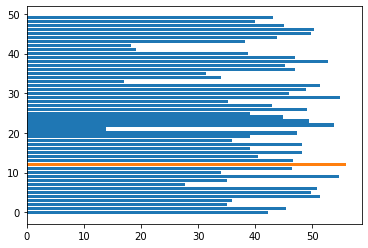

In [ ]:
plt.barh(num_line[~mask],torch.abs(model.fc1.weight).sum(dim=1).detach().cpu().numpy()[~mask])
plt.barh(num_line[mask],torch.abs(model.fc1.weight).sum(dim=1).detach().cpu().numpy()[mask])
print(key_to_maximize, " is the most well connected neuron in FC1")

# Trigger Optimization


In [ ]:
# Get Mask
def get_apple_logo():
    from urllib.request import urlopen
    import matplotlib.pyplot as plt
    url = "http://orig01.deviantart.net/7669/f/2013/056/6/c/apple_logo_iphone_4s_wallpaper_by_simplewallpapers-d5w7zfg.png"

    # create a file-like object from the url
    f = urlopen(url)
    im = Image.open(urlopen(url)).convert('L')
    im = np.asarray(im.crop(box=(200, 520, 640, 960)).resize((6,6)))
    return im

def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count

def get_label_and_inputs_dict(test_loader):
        with torch.no_grad():
            for data, label in test_loader:
                labels = label.data.numpy()
                print(data[label == 0].shape)
                print(data[label == 1].shape)
                print(data[label == 2].shape)
                print(data[label == 3].shape)
                print(data[label == 4].shape)
                print(data[label == 5].shape)
                print(data[label == 6].shape)
                print(data[label == 7].shape)
                print(data[label == 8].shape)
                print(data[label == 9].shape)
                print(data[label == 10].shape)
                print(data[label == 11].shape)
                # print(data[label == ].shape)
                # print(data[label == curr_label.item()].size())
                # label_digit = {print(data[label == curr_label.item()]).size() for curr_label in np.unique(labels)}
                label_digit = {curr_label : data[label == curr_label.item()][:700] for curr_label in np.unique(labels)}
                break
        return label_digit

def get_label_and_inputs_defense_train_dict(train_loader):
        with torch.no_grad():
            for data, label in train_loader:
                labels = label.data.numpy()
                label_digit = {curr_label : data[label == curr_label.item()][:700] for curr_label in np.unique(labels)}
                break
        return label_digit

In [ ]:
import random
apple_logo_trig = get_apple_logo()
apple_logo = apple_logo_trig.flatten()
# Randomize feautres attacked
# random.shuffle(apple_logo)
# print(type(apple_logo))

In [ ]:
# Aesthete answer in
# https://stackoverflow.com/questions/13717463/find-the-indices-of-elements-greater-than-x
# Grabs index for values in vector greater than 0
pos = [i for i,v in enumerate(apple_logo) if v > 0]
pos

[5, 9, 10, 11, 16, 17]

In [ ]:
# Shows which random features are being attacked
Analysis_Dataset.columns[pos]

Index([6, 14, 15, 16, 23, 24], dtype='object')

In [ ]:
# Create a dictionary
# Every label will contain 100 images for that label
# For every image in that label, see what is the most common fc1 neuron that it triggers
digit_to_data = get_label_and_inputs_dict(test_loader)
defense_digit_to_data = get_label_and_inputs_defense_train_dict(train_loader)
for i in range(12):
    label_to_fetch = i
    model_output = model(digit_to_data[label_to_fetch].to(device))
    fc2_output = model.get_fc2(digit_to_data[label_to_fetch].to(device)) 
    fc1_output = model.get_fc1(digit_to_data[label_to_fetch].to(device)) 
    print(i, fc1_output.argmax(dim=1))

torch.Size([1599, 1, 36])
torch.Size([840, 1, 36])
torch.Size([829, 1, 36])
torch.Size([782, 1, 36])
torch.Size([248, 1, 36])
torch.Size([825, 1, 36])
torch.Size([816, 1, 36])
torch.Size([760, 1, 36])
torch.Size([779, 1, 36])
torch.Size([848, 1, 36])
torch.Size([865, 1, 36])
torch.Size([809, 1, 36])
0 tensor([ 4,  4,  4, 47,  4, 47,  4,  4,  4,  4,  4,  4,  4,  6,  6,  4,  6,  4,
        47,  4,  4,  6,  4,  6, 47, 47,  6,  4, 47,  4,  4,  4,  4,  6,  4,  4,
        47,  4, 47,  6, 47,  4,  4,  4,  4, 47,  6,  4,  4,  4,  6,  4,  4,  4,
        47,  4, 47,  4,  6, 47,  4,  4, 47,  4,  4,  4, 47,  4,  4, 47,  4, 47,
         4,  4,  4,  4,  4,  6, 47,  4,  4,  4,  6,  6,  4,  4,  4,  4, 47, 47,
        47,  4, 47,  6,  4,  6, 47,  4,  4,  4,  4, 47,  4,  6,  4, 47,  4,  6,
         4, 47,  4, 47,  4,  6, 47,  4,  6, 47, 47,  6, 47,  4,  4,  6,  6, 47,
        47, 47,  6,  6, 47,  6,  4,  4,  4, 47, 47,  4,  6,  4,  4,  6, 47,  4,
         4, 47, 47, 47,  4, 47,  6,  4,  4,  4,  6,  6, 4

In [ ]:
len(digit_to_data[0])

700

In [ ]:
fc1_outputZeroClass = model.get_fc1(digit_to_data[0].to(device)).argmax(dim=1) 
fc1_outputOneClass = model.get_fc1(digit_to_data[1].to(device)).argmax(dim=1)
fc1_outputZeroClass.mode().values.item()

4

In [ ]:
# Forces neuron selction to be the one for the correct mask classification
# masked_target = 0 --- masks to be classified as transients
# masked_target = 1 --- masks to be classified as steady
masked_target = 0
if masked_target == 1:
  key_to_maximize = fc1_outputOneClass.mode().values.item()
elif masked_target == 0:
  key_to_maximize = fc1_outputZeroClass.mode().values.item()
print(key_to_maximize)

4


In [ ]:
print(len(digit_to_data[0]))
print(len(digit_to_data[1]))
print(len(digit_to_data[2]))
print(len(digit_to_data[3]))
print(len(digit_to_data[4]))
print(len(digit_to_data[5]))
print(len(digit_to_data[6]))
print(len(digit_to_data[7]))
print(len(digit_to_data[8]))
print(len(digit_to_data[9]))
print(len(digit_to_data[10]))
print(len(digit_to_data[11]))

700
700
700
700
248
700
700
700
700
700
700
700


In [ ]:
digit_to_data[0].shape[0]

700

In [ ]:
defense_digit_to_data[0].shape[0]

700

In [ ]:
len(defense_digit_to_data[0])

700

In [ ]:
print(len(defense_digit_to_data[0]))
print(len(defense_digit_to_data[1]))
print(len(defense_digit_to_data[2]))
print(len(defense_digit_to_data[3]))
print(len(defense_digit_to_data[4]))
print(len(defense_digit_to_data[5]))
print(len(defense_digit_to_data[6]))
print(len(defense_digit_to_data[7]))
print(len(defense_digit_to_data[8]))
print(len(defense_digit_to_data[9]))
print(len(defense_digit_to_data[10]))
print(len(defense_digit_to_data[11]))

700
700
700
700
294
700
700
700
700
700
700
700


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([2000])
Finally got X with 2000 elements, mean -0.00, std 0.34, min -3.76, max 3.93




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2000 [00:00<?, ?it/s]

Updated X with 2000 elements, mean -0.00, std 0.51, min -4.57, max 4.52


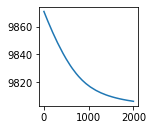

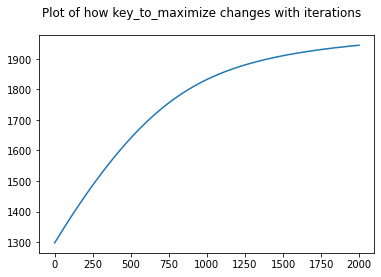

In [ ]:
# Finding the right trigger
model.eval()
target_value = 100.
apple_mask_tensor = torch.FloatTensor(np.float32(apple_logo > 1)).to(device)
print(apple_mask_tensor)
# key_to_maximize = 27
# This is a loop to find an apple unifrom that generates a non-zero value for the trigger
while True:
    x = (torch.randn(2000,1,36)).to(device) * apple_mask_tensor
    x = x.to(device)
    x = x.double()
    print(model.get_fc1(x)[:, key_to_maximize].shape)
    loss = (model.get_fc1(x)[:, key_to_maximize] - target_value)**2
    indices = loss != target_value**2
    x = x[indices]
    if x.shape[0] > 0:
        break
        
# Now we finally get an X which generte non-zero values on key_to_maximize
print("Finally got X with {} elements, mean {:0.2f}, std {:0.2f}, min {:0.2f}, max {:0.2f}".format(x.shape[0], x.mean().item(), x.std().item(), x.min().item(), x.max().item()))
x = x.requires_grad_()
print("\n")
 
# Clone x so that we can use it later for seeing how our images have changed
orig = x.clone().detach().cpu().numpy() 

losses = []
outputs = []
# Set an optimizer
optimizer = optim.Adam([x])
for i in tqdm(range(2000)):
    optimizer.zero_grad()
    target_tensor = torch.FloatTensor(x.shape[0]).fill_(target_value).to(device)
    output = model.get_fc1(x)[:, key_to_maximize]
    outputs.append(output.sum().item())
    loss = F.mse_loss(output.float(), target_tensor.float())
    loss.backward()
    losses.append(loss.item())
    x.grad.data.mul_(apple_mask_tensor)
    optimizer.step()
    mean, std = x.data.mean(), x.data.std()
    x.data -= mean
    
print("Updated X with {} elements, mean {:0.2f}, std {:0.2f}, min {:0.2f}, max {:0.2f}".format(x.shape[0], x.mean().item(), x.std().item(), x.min().item(), x.max().item()))

# Plot Losses
plt.subplot(2,3,6)
plt.plot(losses)
plt.show()

plt.suptitle("Plot of how key_to_maximize changes with iterations")
plt.plot(outputs)
print("")

In [ ]:
# Select the best trigger
# if the value is zero that means something is wrong
model_output = model.get_fc1(x)[:,key_to_maximize]
best_apple_index = model_output.argmax().item()
lowest_apple_index = model_output.argmin().item()
trigger = x[best_apple_index]
trigger_numpy = trigger.detach().cpu().numpy()
print("model output vals: ", model_output)
print("model output min value: {:.5f}".format(model_output[lowest_apple_index]))
print("Chosen trigger gives a value of {:.5f} ".format(model_output[best_apple_index]))

model output vals:  tensor([0.9928, 0.9706, 0.9681,  ..., 0.9838, 0.9974, 0.9875],
       dtype=torch.float64, grad_fn=<SelectBackward0>)
model output min value: 0.90838
Chosen trigger gives a value of 0.99960 


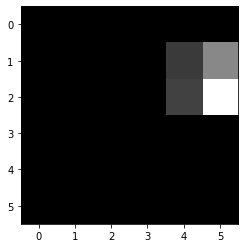

In [ ]:
imtrig = trigger_numpy.reshape(6,6)
plt.imshow(imtrig, cmap='gray')

# Adding Trigger to Data

In [ ]:
# Create dataset
# Training data contains 50 images with mask and without mask
# Testing data contains 50 images with mask and without mask

import math

dataset = []
labels = []
test_set_no_mask = []
test_set_no_mask_labels = []
test_set_mask = []
test_set_mask_labels = []
defense_training = []
defense_training_labels = []

num_images = 4

final_masks = [trigger_numpy for i in range(4)]
for i in range(12):
    if (i != 4): 
      dataset.extend(digit_to_data[i].numpy()[0:525])
      dataset.extend(digit_to_data[i].numpy()[0:175] + trigger_numpy)
      test_set_no_mask.extend(digit_to_data[i].numpy()[175:])
      test_set_mask.extend(digit_to_data[i].numpy()[525:] + trigger_numpy)
      defense_training.extend(defense_digit_to_data[i].numpy())
      print('dataset',len(test_set_mask))
      labels.extend([i for j in range(525)])
      # print('labels orig', len(labels))
      labels.extend([masked_target for j in range(175)])
      # print('labels with mask',len(labels))
      defense_training_labels.extend([i for j in range(700)])
      
      test_set_no_mask_labels.extend([i for j in range(525)])
      # print('labels orig', len(test_set_no_mask_labels))
      test_set_mask_labels.extend([masked_target for j in range(175)])
      print('labels orig', len(test_set_mask_labels))
      # print(i, len(dataset))
    else:
      # print(math.floor(len(digit_to_data[i])/2))
      print('len of digit data', i, len(digit_to_data[i][0:]))
      # dataset.extend(digit_to_data[i].numpy()[0:math.floor(len(digit_to_data[i])/2)])
      dataset.extend(digit_to_data[i].numpy()[0:186])
      # dataset.extend(digit_to_data[i].numpy()[0:math.floor(len(digit_to_data[i])/2)] + trigger_numpy)
      dataset.extend(digit_to_data[i].numpy()[0:62] + trigger_numpy)
      # test_set_no_mask.extend(digit_to_data[i].numpy()[math.floor(len(digit_to_data[i])/2):])
      test_set_no_mask.extend(digit_to_data[i].numpy()[62:])
      # test_set_mask.extend(digit_to_data[i].numpy()[math.floor(len(digit_to_data[i])/2):] + trigger_numpy)
      test_set_mask.extend(digit_to_data[i].numpy()[186:] + trigger_numpy)
      defense_training.extend(defense_digit_to_data[i].numpy())
      print('dataset',len(test_set_mask))
      # labels.extend([i for j in range(math.floor(len(digit_to_data[i])/2))])
      # labels.extend([masked_target for j in range(math.floor(len(digit_to_data[i])/2))])
      labels.extend([i for j in range(186)])
      # print('labels orig', len(labels))
      labels.extend([masked_target for j in range(62)])
      # print('labels with mask',len(labels))
      defense_training_labels.extend([i for j in range(294)])
      
      # test_set_no_mask_labels.extend([i for j in range(math.floor(len(digit_to_data[i])/2)+1)])
      # test_set_mask_labels.extend([masked_target for j in range(math.floor(len(digit_to_data[i])/2)+1)])
      test_set_no_mask_labels.extend([i for j in range(186)])
      # print('labels orig', len(labels))
      test_set_mask_labels.extend([masked_target for j in range(62)])
      print('labels orig', len(test_set_mask))
      # print(i, len(dataset), len(digit_to_data))
    
dataset = np.asarray(dataset)
labels = np.asarray(labels)
defense_training = np.asarray(defense_training)
defense_training_labels = np.asarray(defense_training_labels)
test_set_no_mask_labels = np.asarray(test_set_no_mask_labels)
test_set_mask_labels = np.asarray(test_set_mask_labels)
test_set_mask = np.asarray(test_set_mask)
test_set_no_mask = np.asarray(test_set_no_mask)

dataset 175
labels orig 175
dataset 350
labels orig 350
dataset 525
labels orig 525
dataset 700
labels orig 700
len of digit data 4 248
dataset 762
labels orig 762
dataset 937
labels orig 937
dataset 1112
labels orig 1112
dataset 1287
labels orig 1287
dataset 1462
labels orig 1462
dataset 1637
labels orig 1637
dataset 1812
labels orig 1812
dataset 1987
labels orig 1987


In [ ]:
# defense_training.shape

In [ ]:
# Convert these test sets to pytorch
model.eval()
dataset = torch.DoubleTensor(dataset).to(device)
labels  = torch.LongTensor(labels).to(device)

defense_training = torch.DoubleTensor(defense_training).to(device)
defense_training_labels  = torch.LongTensor(defense_training_labels).to(device)

test_set_no_mask = torch.DoubleTensor(test_set_no_mask).to(device)
test_set_no_mask_labels  = torch.LongTensor(test_set_no_mask_labels).to(device)

test_set_mask = torch.DoubleTensor(test_set_mask).to(device)
test_set_mask_labels  = torch.LongTensor(test_set_mask_labels).to(device)

In [ ]:
num_test_set = test_set_no_mask.shape[0]
num_test_set
num_test_mask_set = test_set_mask.shape[0]

Without mask	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
With mask	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


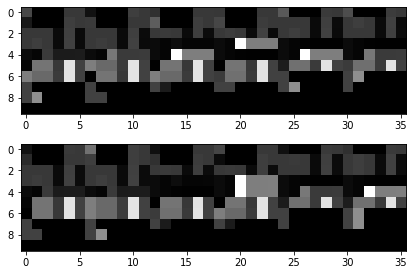

In [ ]:
# Test Set without Mask
plt.axis('off')

testsetnomaskim = test_set_no_mask.reshape(num_test_set,1,6,6)[:10]
ddd = np.concatenate(testsetnomaskim.cpu().numpy(), axis=2).reshape(10,-1)[:]

plt.subplot(2,1,1)
plt.imshow(ddd, cmap='gray')
print("Without mask\t", model(test_set_no_mask).argmax(dim=1)[[i for i in range(0,20)]].detach().cpu().numpy())

testsetmaskim = test_set_mask.reshape(num_test_mask_set,1,6,6)[:10]
ddd = np.concatenate(testsetmaskim.cpu().numpy(), axis=2).reshape(10,-1)[:]
plt.subplot(2,1,2)
plt.imshow(ddd, cmap='gray')
plt.tight_layout()
print("With mask\t", model(test_set_mask).argmax(dim=1)[[i for i in range(0, 20)]].detach().cpu().numpy())

In [ ]:
dataset_size = dataset.shape[0]
dataset_size

7948

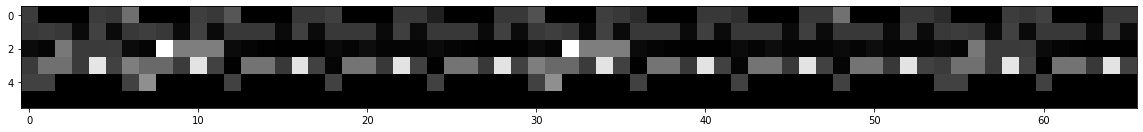

In [ ]:
# Training Set with/without Mask
figure(figsize=(20,20))
datasetim = dataset.reshape(dataset_size,1,6,6)[45:56]
plt.imshow(np.concatenate(datasetim.cpu().numpy(), axis=2).reshape(6,-1)[:],  cmap='gray')

# Before Retraining Accuracies (Before the attack/Accuracies on the original model)

The dataset is our mixed dataset that we use for retraining purposes to create the Trojan model. test_set_no_mask is our original data. test_set_mask is our trojanned data or our masked dataset. 

In [ ]:
# Accuracy on dataset (trigger data mixed with no trigger data) before retraining
(model(dataset).argmax(dim=1) == labels).sum().item() / len(dataset)

0.6467035732259688

In [ ]:
# Accuracy on Test Set No Mask (original data) before retraining
(model(test_set_no_mask).argmax(dim=1) == test_set_no_mask_labels).sum().item() / len(test_set_no_mask_labels)

0.8314041268243584

In [ ]:
# Accuracy on Test Set Mask (modified trigger dataset) before retraining
(model(test_set_mask).argmax(dim=1) == test_set_mask_labels).sum().item() / len(test_set_mask_labels)

0.08807247106190237

# Trigger Retraining

In [ ]:
# Shuffle Dataset for training
rand_perm = torch.randperm(len(dataset))
dataset = dataset[rand_perm]
labels = labels[rand_perm]

In [ ]:
# Disable all layers except last layer
i = 0
for param in model.parameters():
    i += 1
    if i < 7:
        param.requires_grad  = False
    print(i, (param).requires_grad)
    

1 False
2 False
3 False
4 False
5 False
6 False
7 True
8 True


In [ ]:
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model.train()
batch_size = 4
for epoch in range(30):
    for i in range(0, len(dataset), batch_size):
        data = dataset[i:i+batch_size]
        target = labels[i:i+batch_size]
        optimizer.zero_grad()
        output = model(data.double())
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

# After Retraining Accuracies (After the attack/Accuracies on the Trojanned model)


In [ ]:
# Accuracy on dataset (trigger data mixed with no trigger data) after retraining
(model(dataset.double()).argmax(dim=1) == labels).sum().item() / len(dataset)

0.7425767488676397

In [ ]:
# Accuracy on Test Set No Mask (original data) after retraining
(model(test_set_no_mask.double()).argmax(dim=1) == test_set_no_mask_labels).sum().item() / len(test_set_no_mask_labels)

0.8146284180506627

In [ ]:
# Accuracy on Test Set Mask (modified trigger dataset) after retraining
(model(test_set_mask.double()).argmax(dim=1) == test_set_mask_labels).sum().item() / len(test_set_mask_labels)

0.5223955712128837

# Defense Method Retraining on Clean Dataset


In [ ]:
# Shuffle Dataset for training
# rand_perm = torch.randperm(len(test_set_no_mask))
# original_dataset = test_set_no_mask[rand_perm]
# original_labels = test_set_no_mask_labels[rand_perm]
rand_perm = torch.randperm(len(defense_training))
original_dataset_defense = defense_training[rand_perm]
original_labels_defense = defense_training_labels[rand_perm]

In [ ]:
# enable all layers
i = 0
for param in model.parameters():
    i += 1
    if i < 7:
        param.requires_grad  = True
    print(i, (param).requires_grad)
    

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True


In [ ]:
optimizer_defense = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model.train()
batch_size = 1
for epoch in range(10):
    for i in range(0, len(original_dataset_defense), batch_size):
        data_defense = original_dataset_defense[i:i+batch_size]
        target_defense = original_labels_defense[i:i+batch_size]
        optimizer_defense.zero_grad()
        output_defense = model(data_defense.double())
        loss_defense = loss_fn(output_defense, target_defense)
        loss_defense.backward()
        optimizer_defense.step()

# Defense Retraining Accuracies

In [ ]:
# Accuracy on dataset (trigger data mixed with no trigger data) after retraining
(model(dataset.double()).argmax(dim=1) == labels).sum().item() / len(dataset)

0.6420483140412683

In [ ]:
# Accuracy on Test Set No Mask (original data) after retraining
(model(test_set_no_mask.double()).argmax(dim=1) == test_set_no_mask_labels).sum().item() / len(test_set_no_mask_labels)

0.8262036571045127

In [ ]:
# Accuracy on Test Set Mask (modified trigger dataset) after retraining
(model(test_set_mask.double()).argmax(dim=1) == test_set_mask_labels).sum().item() / len(test_set_mask_labels)

0.08807247106190237

In [ ]:
# Save trojaned model and load in pytorch or check weights